# Checkpoint 2

**Due: Friday, 6 November, 2020 at 5:00pm GMT**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh_tridiagonal
from scipy.sparse.linalg import spsolve
from scipy.integrate import simps
from scipy.sparse import diags
from scipy.sparse import identity
import time

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

# Task 1 (25p)

Find numerically the first 101 lowest eigenvalues (“energies”) of the discrete Hamiltonian matrix, H, for V=0 and x=0,...,L, with L=100, dx=1/8 and with reflecting boundary conditions:

$
\begin{align}
\psi_N \equiv \psi_{N-1},
\end{align}
$

$
\begin{align}
\psi_{-1} \equiv \psi_0,
\end{align}
$

Here the index -1 denotes the element to the left of the element zero, not the element N-1 as in Python. Note that indices $-1, N$ refer to elements of $\psi$ that are outside the matrix H.

Hint: The eigenvalues, $w_n$, should be

$
\large
\begin{align}
w_n = \frac{2\left(1 - \cos (\frac{n \pi}{N}) \right)}{dx^2}
\end{align}
$

for n=0, 1,..., 100. The corresponding (non-normalized) eigenvectors, $v_n$ are

$
\large
\begin{align}
v_n = \cos \left( \frac{n \pi x}{L} \right)
\end{align}
$

for x=0, dx,..., (N-1)dx.

In [72]:
### Values for task 1
L  = 100
dx = 1/8
N  = int(L/dx)
print(f"Matrix size: {N}.")

Matrix size: 800.


In the cell below, compute the 101 lowest eigenvalues given the values of V, L, and dx from above. The function, `task1` should return an array of the eigenvalues.

It may be useful to write a generalized function for creating the Hamiltonian given values of N, dx, and V.

In [73]:
"""
Function which creates a tridiagonal matrix of wavefunctions and then returns the eigenvalues and eigenvectors of the matrix

"""
def hamiltonian(dx, N,evals, V,min_eval):
    
    
   
    c2 = 0
    hbar = 1
    m = 1/2
    c1 = (hbar**2)/(2*m)
    
    #create a two diamential array filling one row with -2 and another row with -1
    diagonals = [np.full((N),  -2),
                 np.full((N-1), 1),]
    
    #apply reflecting boundary conditions. First element and last element changed value from -2 to 1
    diagonals[0][0] = -1
    diagonals[0][-1] = -1
  
    #converts 2d array into two separate arrays, one for the main diagonal and one for the of diagonal. 
    main_diag = ((diagonals[0]*-c1) / ((dx)**2)) + V
    off_diag = ((diagonals[1]*-c1)/ ((dx)**2))
    
    #gets eigenvalues and eigenvectors of the matrix with three diagonals (main diagonal and two off diagonals)
    ww ,vv = eigh_tridiagonal(main_diag, off_diag ,  eigvals_only=False, select = "i", select_range=(min_eval,evals))
    
    return ww, vv


    
def task1():
    #potential set to zero, set range of eigenvalues to be calculated
    V = 0
    evals = 100
    min_eval = 0
    ww, vv = hamiltonian(dx, N, evals, V, min_eval)
 
   
    
    return(ww)


## Testing task 1

The cell below will run your function and compare it with the expected values.

Time to solution: 0.0525510311126709 seconds.


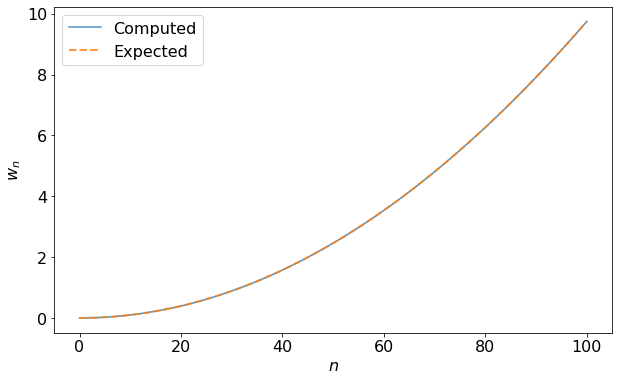

Max difference is 1.7702117765407015e-11.


In [74]:
t1 = time.time()
ww = task1()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")

my_n = np.arange(101)
ww_expected = 2 * (1 - np.cos(my_n*np.pi/N)) / dx**2

plt.plot(my_n, ww, label='Computed', alpha=0.8)
plt.plot(my_n, ww_expected, label='Expected', linewidth=2, linestyle='--', alpha=0.8)
plt.xlabel(r'$n$')
plt.ylabel(r'$w_{n}$')
plt.legend()
plt.show()

diff = np.abs(ww - ww_expected) / np.max(np.abs([ww, ww_expected]), axis=0)
print (f"Max difference is {diff[1:].max()}.")
assert (diff[1:] < 1e-6).all()

# Task 2 (5p)

Select dx as a negative power of two ($dx=2^{-n}$ for n>0) such that the 101th eigenvalue differs from the dx$\rightarrow$0 limiting value of

$
\begin{align}
w_{101,exact} = \frac{(100\pi/N)^{2}}{dx^2}
\end{align}
$

by less than 0.1%, i.e., $|w_{101}/w_{101,exact}-1|<0.001$.

Motivation: selecting a sufficiently small dx is required to obtain a good approximation to the original (continuous) equation (1) for subsequent tasks.

In the cell below, compute a value of dx that satisfies the above contraint. The function `task2` should return the value of dx that you have calculated.

In [75]:
""" 
Iterates through integer values of n, calculates w101_exact and w101 with corresponding dx and checks if ratio of 
(w101/w101_exact) - 1 < 0.001, if it is, returns the value of dx.

"""

def task2():
    lim = 0.001
    V = 0
    for n in range(1, 10):
        dx = 2**(-n)  
        N = int(L/dx)
        evals = 100
        min_eval = 0
     
        ww, vv = hamiltonian(dx, N, evals, V, min_eval)
        
        #101st lowest eigenvalueset to w101
        w101 = ww[100]
       
        w101_exact = ((100*np.pi/N)**2) / dx**2
        
        #loop breaks and dx is returned if the condition is met
        if abs((w101/w101_exact) - 1) < lim:
            return dx
            break
         
        else:
            pass
    print(dx)
task2()
 


0.03125

## Testing task 2

The cell below will run the `task2` function. We will verify that value of dx return satisfies the criterion outlined above.

In [76]:
t1 = time.time()
my_dx = task2()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")


Time to solution: 0.4109771251678467 seconds.


# Task 3 (20p)

Solve equation (1) with the initial condition (2) (the Schroedinger equation and the Gaussian function from the checkpoint's description) for V(x)=0, on a domain x=0...100, for t=0...4 and dx from task 2. Plot $|\psi(x,t)|^2$ and determine its mean given by

$
\large
\begin{align}
<x>\ = \int_{0}^{100} |ψ(x)|^2 x dx.
\end{align}
$

The mean should be equal to 79$\pm$-1.

Hint: use the procedure for creating the Hamiltonian matrix from tasks 1, 2. This will reduce the amount of coding required.

In [77]:
### Constants for task 3 and 4
x0     = 15
v      = 16
sigma2 = 5
tmax   = 4

## Task 3 plot and result

In the cell(s) below, do the following:
1. Solve equation (1) for t=0...4 and plot $|\psi(x,t=0)|^2$ and $|\psi(x,t=tmax)|^2$ as a function of x.
2. Compute the mean of the final position and print the value. The correct result should be between 78 and 80.

Don't forget to nomalize your Gaussian initial condition so that the total probability $\int_0^L |\psi(x,t=0)|^2 dx=1$. 

You do not have to wrap up the calculation in a function "task3()", but doing so may help to reduce the amount of coding for tasks 4-6.

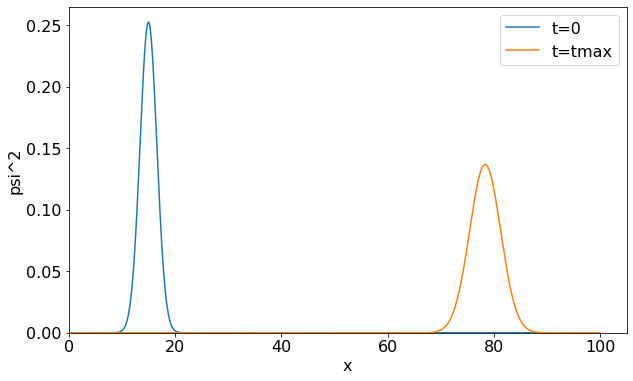

78.33232109516695


In [78]:
"""

Function which takes the initial condition psi_0 and normalises it.

"""

def normalise(psi_0, x):
    #calculate probability density 
    psi_02 =(np.conjugate(psi_0) * psi_0).real
    #integrate probability density function with respect to x
    integral = simps(psi_02, x)
    #multiply psi_0 by normalisation factor. Normalisation factor is the equation for normalising a gaussian.
    psi_0 = (1/np.sqrt(integral))*psi_0

    return psi_0


""" 

Function calculates probability densities psi_n2 and psi_02 and then returns the normalised probability densities

"""
def psi(V=0):
    
    dx = task2()     
    N  = int(L/dx)
    x = np.arange(0,L , dx)
    t = np.linspace(0,tmax, N)
    dt = tmax / N  
    
    #initial conditions, this is the initial value for psi given in the question, it is an array with elements corresponding to
    #each x value
    psi_0 =   np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v*x)/2)
    psi_0 = normalise(psi_0, x)
    
    #increase range of eigenvalues(and  eigenvectors) to return. higher number of eigenvalues gives higher accuracy probability
    #densitites, but too many takes a long tim to execute so 400 is a compromise retaining accuracy and fast to execute
    evals = 400
    min_eval = 0
    ww, vv  = hamiltonian(dx, N, evals, V, min_eval)
    
    #scalar product of the transpose of the eigenvectors  and the psi_0 array
    a = vv.T.dot(psi_0)

    #solving for psi, using summation instead of iterating through the a array.
    psi_n = (a * np.exp(-1j* ww * tmax) * vv).sum(axis=1) 
    
    #calculating probability densities by multiplying both arrays(psi_0 and psi_n) by their corresponding conjugate
    psi_02 =(np.conjugate(psi_0) * psi_0).real
    psi_n2 = (np.conjugate(psi_n) * psi_n).real
        
    return x,psi_n2, psi_02, tmax



"""

Function to plot probability densities(at t0 and tmax) against x)

"""

def plot():
    
    x, psi_n2, psi_02, tmax = psi()
    
    plt.plot(x, psi_02, label ='t=0')
    plt.plot(x, psi_n2, label =f't=tmax')
    plt.xlim(0)
    plt.ylim(0)
    plt.xlabel("x")
    plt.ylabel("psi^2")
    plt.legend()
    plt.show()
    
    

"""
Function to calculate and returnm the mean of psi at tmax by integrating the probability density multiplied by x between 100 and 0, this 
is given in the question

"""


def mean():
  
    x, psi_n2, psi_02, tmax = psi()
    y =(psi_n2*x) 
    mean = simps(y, x) 
    print(mean)
   
   

def task3():
    plot()
    mean()
    
task3()
    
    
    
    


# Task 4 (10p)

Now repeat task 3 for a potential made up of regularly spaced wells such that

V=70 for |x-i| < 0.25 where i=0,1,...,100,

and V=0 elsewhere.

Plot the potential. It should be $V=70$ for $x=0...0.25$, $V=0$ for $x=0.25...0.75$, $V=70$ for $x=0.75...1.25$, and so on.

Determine the mean of $|\psi(x,t)|^2$ as before, with accuracy $\pm$1.

Make sure that dx and dt are sufficiently small to achieve this accuracy!

In the cell below, create the potential and plot it over the range [0, 3].

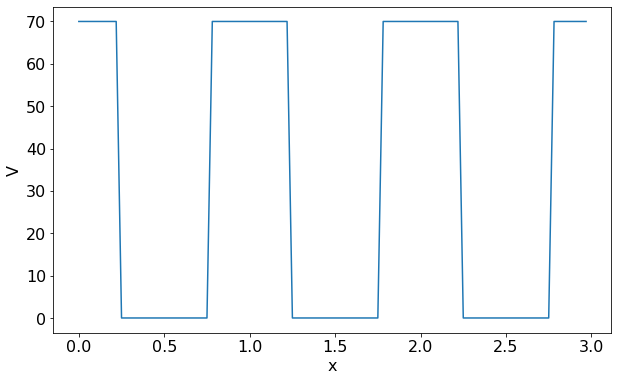

In [80]:
""" 
Function to create the new potential

"""

def potential(x):
    
    i = np.linspace(0,100,101)
    
    #create empty list to store values of the potential
    V = []
    
    #loop through range of the size of the x array and appends 0 or 70 to the potential list in each iteration
    for n in range(len(x)):
        #create an array full of one x value(changes with each iteration) with the length of the i array
        x_list = np.full(len(i),x[n])
        #subtract i elements from x_list elements, if any of the elements of the resulting array are < 0.25, append 70 to
        #potential list, if not append 0
        vals = abs(x_list - i) 
        if any(vals < 0.25):
            V.append(70)
        else:
            V.append(0)
 
    return V 

def plotV():
    dx = task2()
    x = np.arange(0, L, dx)
    V = potential(x)  
    V = np.array(V)
    plt.xlabel("x")
    plt.ylabel("V")
    
    #plot potential against x. Slicing has been used to create a plot in the 0 to 3 x interval.
    plt.plot(x[x<3],V[x<3])

plotV()




# Task 4 continued

In the cell below, repeat task 3 with the new potential.

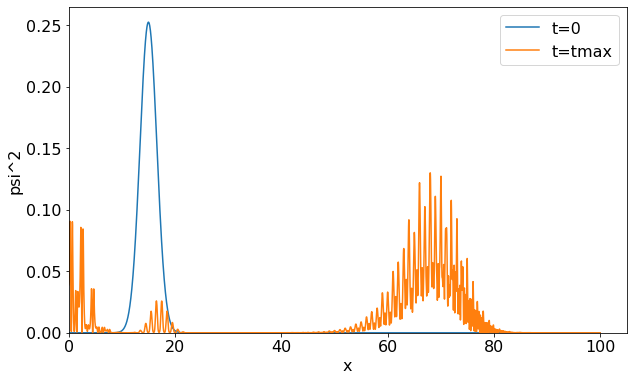

56.39865348431639


In [81]:
"""
Function which calls hamiltonian function from task one to create a tridiangonal matrix and returns the eigenvalues 
and eigenvectors.

"""
def psi2(V, evals, min_eval):
    
    dx = task2()     
    N  = int(L/dx)
    x = np.arange(0,L , dx)
    t = np.linspace(0,tmax, N)
 
  
    
 
    ww, vv  = hamiltonian(dx, N, evals, V, min_eval)
    
    return ww, vv

"""
Similar to psi function in task. Takes initial conditions, calls normalise function to normalise initial wavefunction 
and calculates wave functions and probability density functions before returning the probability densities.

"""

def prob_density(V):
    evals = 600
    min_eval = 0
    dx = task2()    
    x = np.arange(0,L , dx)
    psi_0 =   np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v*x)/2)
    psi_0 = normalise(psi_0, x)
    ww,vv = psi2(V, evals, min_eval)
    a = vv.T.dot(psi_0)
    
    
    
  
    psi_n = (a * np.exp(-1j* ww * tmax) * vv).sum(axis=1) 
    psi_02 =(np.conjugate(psi_0) * psi_0).real
    psi_n2 = (np.conjugate(psi_n) * psi_n).real
    
    
    return x, psi_n2,psi_02


def plot2(V):
    
    x, psi_n2, psi_02 = prob_density(V)
    
    plt.plot(x, psi_02, label ='t=0')
    plt.plot(x, psi_n2, label =f't=tmax')
    plt.xlim(0)
    plt.ylim(0)
    plt.xlabel("x")
    plt.ylabel("psi^2")
    plt.legend()
    plt.show()
    
def mean2(V):
    x, psi_n2, psi_02 = prob_density(V)
    y =(psi_n2*x) 
    mean = simps(y, x) 
    print(mean)


def task4():
    dx = task2()
    x = np.arange(0, L, dx)
    V = potential(x)
    plot2(V)
    mean2(V)  
task4()
    
    
    
    



# Task 5 (15p)

Calculate the probability $P_{1/2}$ of the particle moving through the point x=L/2 by integrating the probability current 

$
\large
\begin{align}
j = (\psi^*  \frac{\partial \psi}{\partial x} -
\psi \frac{\partial \psi^*}{\partial x})(x=L/2)
\end{align}
$

over time, for t=0...4. The probability can deviate from the true value by no more than $\pm$0.01 (hint: the correct value is between 0.5 and 1).

In the cell below, calculate the probability and print your answer.

In [82]:
""" 

For this task  I initially ran the code with a large number of eigenvalues in order to determine an accurate value of the
probability. Then I reduced the min and max eigenvalue indice that the eigsh function would calculate ensuring that the
outputted probability similar to the accurate value I had determined. The lower number of eigenvalues calculated speeds up 
execution time for this task. Another way to speed up the execution time with minimal impact to the accuracy was by increasing
the value of dt. I initially had it very small at (dx^2)/2 and then increased it to increase speed while retaining an accurate 
answer.
"""


def task5():
    t1 = time.time()
    dx= 0.03125
    x = np.arange(0,L, dx)
    dt = dx*3.2
    t = np.arange(0,tmax,dt)
    V = potential(x)

 
    evals = 485
    min_eval = 220
    #intial conditions and eigenvalues/eigenvectors, call normalisation function
    ww, vv = psi2(V, evals, min_eval)    
    psi_0 =  (np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v*x)/2))
    psi_0 = normalise(psi_0, x)
   
    
    a = vv.T.dot(psi_0)
    
    # Create three empty lists to store wavefunction at L/2, the wavefunction at (L/2) + 1 and the wavefunction at (L/2) -1
    # Psi_ta and psi_tb can be used as a way to calculate the differential of psi with respect to x. By taking the value of
    # psi_t above and below the differential is found symmetrically(dividing by 2*dx), which is more accuracte than calculating
    # difference over one time step.
    psi_t = []
    psi_ta = []
    psi_tb = [] 
   
    #loop through length of time array to get psi_n arrays at each time
    for q in range(len(t)):
        psi_n = (a * np.exp(-1j* ww* t[q]) * vv).sum(axis=1)
        psi_t.append(psi_n[int(len(x)/2)])
        psi_ta.append(psi_n[int((len(x))/2)+1])
        psi_tb.append(psi_n[int((len(x))/2)-1])
    
    psi_t = np.array(psi_t)

    
    psi_ta = np.array(psi_ta)
    psi_tb = np.array(psi_tb)
    
    psic_t = np.conjugate(psi_t)
    psic_ta = np.conjugate(psi_ta)
    psic_tb = np.conjugate(psi_tb)
             
    
    #calculate diffential of psi with respect to x, using the difference in psi_ta and psi_tb and dividing by 2*dx
    dpsi = (psi_ta-psi_tb)/(2*dx)
    dpsic = np.conjugate(dpsi)
    
    #calculate probability current using the equation given in the question
    prob_current = (-1j * (psic_t *dpsi - psi_t*dpsic)).real
 
    
    integral = simps(prob_current, t) 
    
    print(integral)
    t2 = time.time()
    print (f"Time to solution: {t2-t1} seconds.")
   



task5()    

0.8180164288603097
Time to solution: 1.4673817157745361 seconds.


# Task 6 (15p)

Plot the probability $P_{1/2}$ as a function of particle energy E=0...100, for at least 100 equally-spaced values from this range. All $P_{1/2}$ values should be within $\pm$0.01 of the true values. Use the formula 

$
\large
\begin{align}
E = \frac{1}{4} v^2
\end{align}
$

to convert between energy and velocity (valid for Eqs. (1,2)).

Bonus question: can you explain why the plot looks like this?

Plot the probability in the cell below.

Time to solution: 45.22301387786865 seconds.


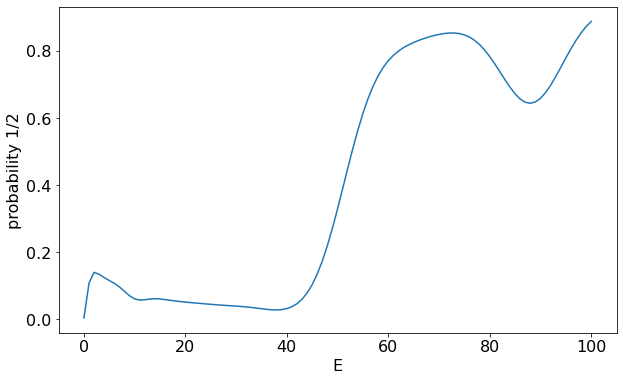

In [83]:
"""
My approach to this task was to use the code from task 5 in order to calculate the probability current and probabilities. 
I iterate through the number of energy values to calculate a new inital condition psi_0 (which depends on velocity and therefore
energy) for every energy value. I append each of these values to a list which I convert to an array and then determine the 
average. This task takes about 45 seconds to run.

"""

def task6():
    t1 = time.time()
    dx = 0.03125 
    x = np.arange(0,L, dx)
    dt = dx*3.2
    t = np.arange(0,tmax,dt)
    V = potential(x)

 
    evals = 485
    min_eval = 220
    
    ww, vv = psi2(V, evals,min_eval)  
    
    #creates an array of energy values
    E = np.linspace(0,100,101)  
    #create an array of velocities where the velocities are calculated from the energy values
    v = np.sqrt(4*E)
    
    #A list to store the probabilities at x/2
    p_half = []
    
    #iterate through length of energy value array 
    for k in range(len(E)):
        psi_0 =  (np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v[k]*x)/2))
        psi_0 = normalise(psi_0, x)
       

        a = vv.T.dot(psi_0)

        psi_t = []
        psi_ta = []
        psi_tb = [] 

        #embedded for loop to append wavefunctions at x/2 into list
        for q in range(len(t)):
            psi_n = (a * np.exp(-1j* ww* t[q]) * vv).sum(axis=1)
            psi_t.append(psi_n[int(len(x)/2)])
            psi_ta.append(psi_n[int((len(x))/2)+1])
            psi_tb.append(psi_n[int((len(x))/2)-1])

        psi_t = np.array(psi_t)


        psi_ta = np.array(psi_ta)
        psi_tb = np.array(psi_tb)

        psic_t = np.conjugate(psi_t)
        psic_ta = np.conjugate(psi_ta)
        psic_tb = np.conjugate(psi_tb)
        dpsi = (psi_ta-psi_tb)/(2*dx)
        dpsic = np.conjugate(dpsi)
        
        #using wavefunctions and their conjugates to calculate probability current with a new energy value in each iteration.
        prob_current = (-1j * (psic_t *dpsi - psi_t*dpsic)).real
        prob_current = prob_current.ravel()

        integral = simps(prob_current, t) 
        
        
        p_half.append(integral)
        
    plt.xlabel("E")
    plt.ylabel("probability 1/2")     
    #plot probabilities against the energy values
    plt.plot(E,p_half)
    t2 = time.time()
    print (f"Time to solution: {t2-t1} seconds.")
   
        
task6()

# Task 7 (10p)

Assume again the initial condition of equation (2) with v=16, and consider a disordered potential in which

V=70 for |x-i| < b$_i$ where i=0,1,...,100,

and b$_i$ is a random variable uniformly distributed on [0.125, 0.375].

Find the probability $P_{1/2}$ by averaging over 100 realizations of the random potential (must be accurate to $\pm$0.02). Plot the histogram of $P_{1/2}$. Comment on the value of $P_{1/2}$ compared with task 5.

In [103]:
"""
Function to create a potential based on the new conditions. An array that is the size of the x array is created and filled 
random floats which are used to create a potential)
"""

def potential2(x):
    i = np.linspace(0,100,101)
    #create array of random floats between 0.125 and 0.375 and of a size equal to the length of 101
    b = np.random.uniform(low=0.125, high=0.375, size=(101,))
    V = []
    
    # This is the same loop that is used in task 4, however now instead of a condition condition vals < 0.025, the 0.025 value
    # is a random float which changes after every iteration
    for n in range(len(x)):
        x_list = np.full(len(i),x[n])
        vals = abs(x_list - i) 
        if any(vals < b):
            V.append(70)
        else:
            V.append(0)

     
    return V 



def task7():

    dx = 0.03125
    x = np.arange(0, L, dx)
  

    dt = dx*3.2
    t = np.arange(0,tmax,dt)
    
   
 
    evals = 485
    min_eval = 220
    probabilities = []
    
    # loops 100 times, in each iteration a new (random) potential is created from potential2 function and used to calculate new
    # initial conditions and wavefunctions which are used to calculate a new probability in each iteration
    for r in range(100):
        V = potential2(x)
        V = np.array(V)
        psi_0 =  (np.exp(-(((x-x0)**2)/(2*sigma2)) + (1j*v*x)/2))
        psi_0 = normalise(psi_0, x)
    
        ww, vv = psi2(V, evals, min_eval)    


        a = vv.T.dot(psi_0)

        psi_t = []
        psi_ta = []
        psi_tb = [] 


        for q in range(len(t)):
            psi_n = (a * np.exp(-1j* ww* t[q]) * vv).sum(axis=1)
            psi_t.append(psi_n[int(len(x)/2)])
            psi_ta.append(psi_n[int((len(x))/2)+1])
            psi_tb.append(psi_n[int((len(x))/2)-1])

        psi_t = np.array(psi_t)


        psi_ta = np.array(psi_ta)
        psi_tb = np.array(psi_tb)

        psic_t = np.conjugate(psi_t)
        psic_ta = np.conjugate(psi_ta)
        psic_tb = np.conjugate(psi_tb)



        dpsi = (psi_ta-psi_tb)/(2*dx)
        dpsic = np.conjugate(dpsi)

        prob_current = (-1j * (psic_t *dpsi - psi_t*dpsic)).real


        integral = simps(prob_current, t) 
        probabilities.append(integral)
    
    probabilities = np.array(probabilities)
    #calculates average probabilty from the 100 probabilties calculated using different potentials
    print(np.average(probabilities))
    
    return probabilities
    


0.04891741487171969


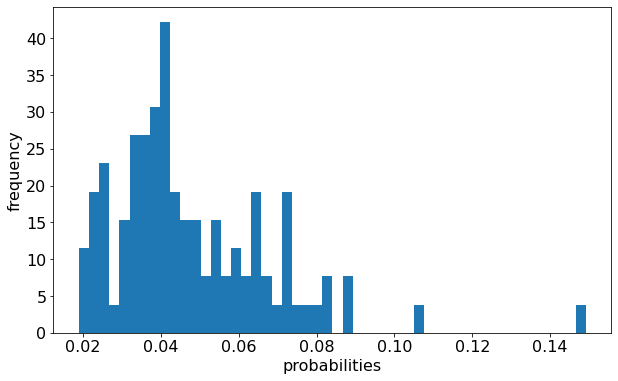

In [104]:
def histogram():
    probabilities = task7()
    
    #plot histogram of the probabilities with 50 bins.
    hist, bins = np.histogram(probabilities, bins=50, density=True)
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
    plt.xlabel("probabilities")
    plt.ylabel("frequency")
    plt.show()
histogram()
    
